In [2]:
#author: Fidel Himothy Ngo Rene Lisasi Jamia Jackson
#Fraud Detection NN
#Machine Learning
#feedforward with one hidden layer and 4 neurons

In [1]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
# Feedforward Neural Network
class FNN():
  # this method is a constructor and is used to create an instance of the feedforward neural network model containing the training data
  # parameters
  # learning_rate: this contains a float which is used to change how big of a jump the data will make
  # epoch: this contains a integer which is used to repeat the training epoch times
  # x: this contains the training dataset examples
  # y: this contains the training dataset answers
  def __init__(self, learning_rate, epoch, x, y):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.x = x
    self.y = y
    self.number_data, self.number_feature = x.shape
    self.input_weights = np.zeros((self.number_feature, 4))
    self.bias = 1
    self.bias_output = 1
    self.hidden_weights = np.zeros(4)

  # this method is used for back propagation
  # parameters
  # hidden_output: this contains an array that contains the hidden_input values but with relu applied to it
  # output_output: this contains an array that contains the output_input values but with sigmoid applied to it
  def backward_pass(self, hidden_output, output_output):
    # Calculate errors
    output_error = output_output - self.y
    hidden_error = np.outer(output_error, self.hidden_weights)

    # Calculating gradients
    output_weights_gradient = (1/self.number_data) * np.dot(hidden_output.T, output_error)
    output_grad_bias = (1/self.number_data) * np.sum(output_error)
    hidden_weights_gradient = (1/self.number_data) * np.dot(self.x.T, hidden_error)
    hidden_grad_bias = (1/self.number_data) * np.sum(hidden_error)

    # Updating weights and biases
    self.hidden_weights -= self.learning_rate * output_weights_gradient
    self.bias_output -= self.learning_rate * output_grad_bias
    self.input_weights -= self.learning_rate * hidden_weights_gradient
    self.bias -= self.learning_rate * hidden_grad_bias

  # trains the model
  def fit(self):
    losses=[]
    for p in range(self.epoch):
      # input to hidden
      hidden_input = np.dot(self.x, self.input_weights) + self.bias
      relu_activation = np.maximum(0, hidden_input)

      # hidden to output using sigmoid since it is a binary classification
      output_hidden = np.dot(relu_activation, self.hidden_weights) + self.bias_output
      Sigmoid = 1 / (1 + np.exp(-output_hidden))

      #loss
      loss=(np.divide(-1,len(self.x))*np.sum(((self.y*np.log(Sigmoid))+((1-self.y)*np.log(1-Sigmoid)))))
      print(loss)
      losses.append(loss)
      # gradiants
      self.backward_pass(relu_activation, Sigmoid)
    return losses

  # finds the accuracy with the testing dataset
  # parameters
  # x_test: contains the testing dataset examples
  # y_test: contains the testing dataset answers
  def accuracy(self, x_test, y_test):
    # calculate the outputs
    hidden_input = np.dot(x_test, self.input_weights) + self.bias
    relu_activation = np.maximum(0, hidden_input)

    # hidden to output
    output_hidden = np.dot(relu_activation, self.hidden_weights) + self.bias_output
    Sigmoid = 1 / (1 + np.exp(-output_hidden))

    accuracy = 0
    # finds accuracy
    for i in range(len(Sigmoid)):
      # uses the threshold to determine if it is 1 or 0
      if Sigmoid[i] > .5:
        # checks if the guess was correct, if it was increment by 1
        if y_test[i] == 1:
          accuracy += 1
      else:
        # checks if the guess was correct, if it was increment by 1
        if y_test[i] == 0:
          accuracy += 1

    # returns the percentage
    return (accuracy / len(y_test)) * 100

In [4]:
import pandas as pd
def get_data(filename):
    df = pd.read_csv(filename)
    x = df.drop(columns=['merchant','first','last','gender','street','city','state','zip','job','dob','trans_num','unix_time','trans_date_trans_time','cc_num'])
    # y = df['is_fraud']
    dataset=x
    # dataset = np.column_stack((x, y))
    #np.random.shuffle(dataset)
    # Split data
    train_size = int(0.7 * len(dataset))
    train_dataset, test_dataset = dataset[:train_size], dataset[train_size:]
    #features
    train_dataset=np.delete(train_dataset,0,axis=1)
    test_dataset=np.delete(test_dataset,0,axis=1)
    #targets
    train_target=train_dataset[:,7]
    test_target=test_dataset[:,7]

    train_dataset=np.delete(train_dataset,7,axis=1)
    test_dataset=np.delete(test_dataset,7,axis=1)

    return train_dataset, test_dataset, train_target, test_target

In [13]:
#output get_data
train_sample,test_sample,train_target,test_target=get_data('fraudTrain.csv')

# this scales the data so it is easier to work with, in this case to prevent the data from going to undefined since the numbers can get very small without scaling it
scaler = StandardScaler()
train_sample_scaled = scaler.fit_transform(train_sample)
test_sample_scaled = scaler.transform(test_sample)

# Feedforward Neural Networks running
print("-----------------------------------FNN-----------------------------------")
Feedforward_Neural_Network = FNN(0.1, 100, train_sample_scaled, train_target)
loss=Feedforward_Neural_Network.fit()
print("Accuracy:",Feedforward_Neural_Network.accuracy(test_sample_scaled, test_target))

-----------------------------------FNN-----------------------------------
1.3073366355428864
1.0580398328331246
0.8542718053173121
0.6858963921324835
0.5486539227788059
0.4396011895413204
0.3550620556172166
0.2905761771613753
0.2416596278422473
0.2044306994419708
0.17583531220740287
0.15359742555714057
0.13606513033378367
0.12205025881350853
0.1106969842392932
0.1013843068633107
0.09365681608097598
0.0871762725491728
0.08168878734510185
0.07700118246558757
0.07296460902736392
0.06946310747404703
0.06640528570274053
0.06371844082717151
0.06134430201844714
0.059235573901768895
0.05735335221077104
0.05566562072342658
0.05414618570087303
0.05277292029531447
0.0515273726170229
0.05039386154700649
0.04935891651613591
0.048411253176020755
0.04754104051944345
0.046739785303364444
0.04600030501230367
0.04531608646136204
0.044681618970204486
0.04409206359905905
0.04354304376021817
0.043030747106105785
0.042551940927371364
0.04210356264851642
0.041682687153345346
0.041287202711617184
0.0409150921

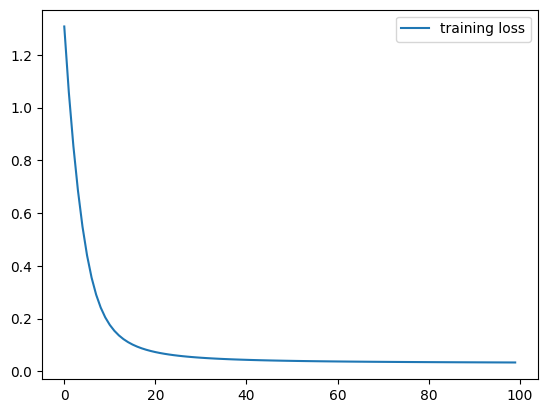

In [14]:
import matplotlib.pyplot as plt
def chart(x_plane,loss_type):
    plt.figure()
    plt.plot([m for m in range(len(x_plane))],x_plane, label=loss_type)
    plt.legend()
    plt.show()

#plot training loss
chart(loss,'training loss')